In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [1]:
import tensorflow as tf

# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU is available:", gpus)
else:
    print("❌ No GPU detected. Running on CPU.")


KeyboardInterrupt: 

In [32]:
# Define labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

In [40]:
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # Assign class index based on label
        for img in os.listdir(path):
            try:
                # Read the image in grayscale using PIL
                img_arr = Image.open(os.path.join(path, img)).convert("L")
                
                # Resize image to the target size
                img_arr = img_arr.resize((img_size, img_size))
                
                # Convert image to numpy array
                img_arr = np.array(img_arr)
                
                data.append([img_arr, class_num])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    return np.array(data, dtype=object)

In [35]:
# Paths for Kaggle dataset
train_path = 'c:/Users/PC-CLICK-PLUS/Desktop/memoire/dataset/chest_xray/train'
test_path = 'c:/Users/PC-CLICK-PLUS/Desktop/memoire/dataset/chest_xray/test'
val_path = 'c:/Users/PC-CLICK-PLUS/Desktop/memoire/dataset/chest_xray/val'

In [41]:
# Load data
train_data = get_training_data(train_path)
test_data = get_training_data(test_path)
val_data = get_training_data(val_path)


In [42]:
# Combine all data for splitting
all_data = np.concatenate([train_data, test_data, val_data])
np.random.shuffle(all_data)  # Shuffle for randomness


In [43]:
# Split data for input and output (50% each)
total_data = len(all_data)
train_limit = total_data // 2

input_data = all_data[:train_limit]
output_data = all_data[train_limit:]

In [44]:
# Prepare input and output data
x_input, y_input = [], []
x_output, y_output = [], []

for feature, label in input_data:
    x_input.append(feature)
    y_input.append(label)

for feature, label in output_data:
    x_output.append(feature)
    y_output.append(label)

In [45]:
# Normalize the data
x_input = np.array(x_input) / 255
x_output = np.array(x_output) / 255


In [46]:
# Reshape data for deep learning input
x_input = x_input.reshape(-1, img_size, img_size, 1)
y_input = np.array(y_input)

x_output = x_output.reshape(-1, img_size, img_size, 1)
y_output = np.array(y_output)

In [47]:
# Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_input)

In [ ]:
# Build the CNN model
model = Sequential([    
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.1),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\PC-CLICK-PLUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 951,489 (3.63 MB)

 Trainable params: 950,401 (3.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [49]:
# Learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

In [50]:
# Train the model
history = model.fit(
    x_input, y_input,
    epochs=12,
    validation_split=0.2,  # 20% of input data used for validation
    batch_size=32,
    callbacks=[learning_rate_reduction]
)


Epoch 1/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 456ms/step - accuracy: 0.7889 - loss: 1.0525 - val_accuracy: 0.7594 - val_loss: 5.4697 - learning_rate: 0.0010
Epoch 2/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - accuracy: 0.8905 - loss: 0.2688 - val_accuracy: 0.7594 - val_loss: 7.6648 - learning_rate: 0.0010
Epoch 3/12
69/74 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step - accuracy: 0.9344 - loss: 0.1869

KeyboardInterrupt: 

In [16]:
# Evaluate the model on output data
evaluation = model.evaluate(x_output, y_output)
print("Loss on output data: ", evaluation[0])
print("Accuracy on output data: ", evaluation[1] * 100, "%")


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9527 - loss: 0.2303
Loss on output data:  0.23621249198913574
Accuracy on output data:  95.42349576950073 %


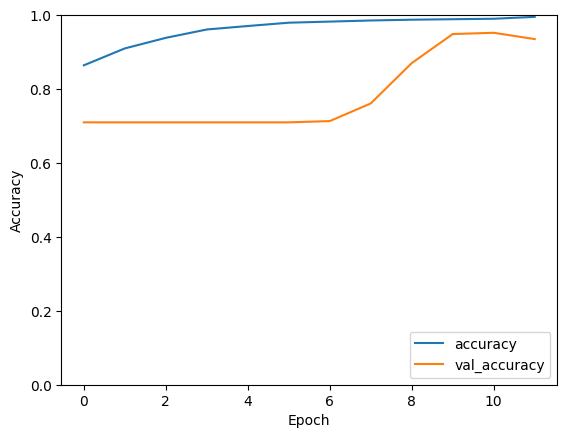

In [17]:
# Visualize training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [18]:
# Predict and generate classification report
predictions = (model.predict(x_output) > 0.5).astype("int32")
print(classification_report(y_output, predictions, target_names=labels))

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

   PNEUMONIA       0.95      0.99      0.97      2147
      NORMAL       0.97      0.85      0.91       781

    accuracy                           0.95      2928
   macro avg       0.96      0.92      0.94      2928
weighted avg       0.96      0.95      0.95      2928



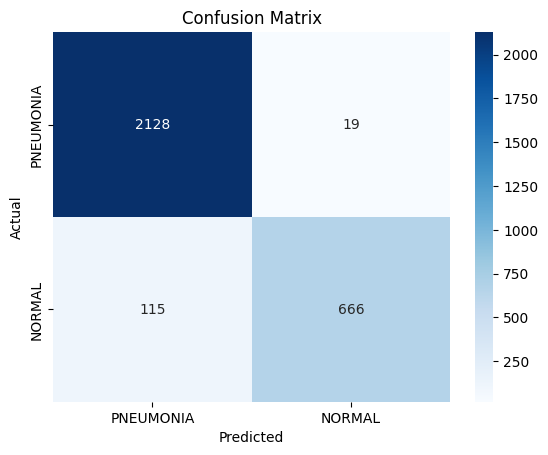

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_output, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

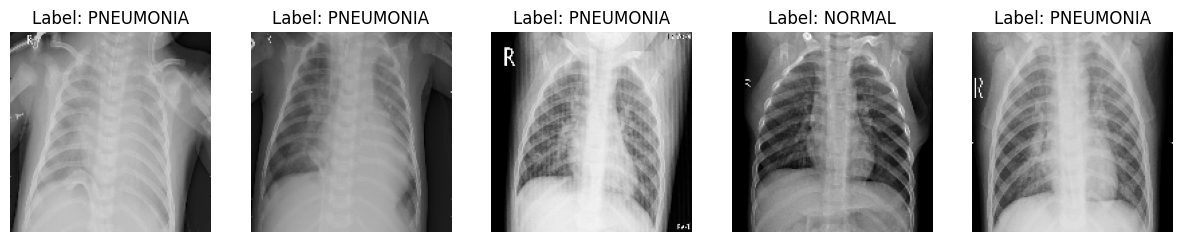

In [ ]:
# Function to display sample X-ray images
def plot_sample_images(data, labels_map, num_samples=5):
    plt.figure(figsize=(15, 7))
    for i in range(num_samples):
        index = np.random.randint(0, len(data))
        image, label = data[index]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {labels_map[label]}")
        plt.axis('off')
    plt.show()

# Labels map
labels_map = {0: 'PNEUMONIA', 1: 'NORMAL'}

# Display sample images from the training dataset
plot_sample_images(input_data, labels_map, num_samples=5)
